<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Insurance Price Regression.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [14]:
label = LabelEncoder()
label.fit(df['sex'])
df['sex'] = label.transform(df['sex'])

label.fit(df['smoker'])
df['smoker'] = label.transform(df['smoker'])

label.fit(df['region'])
df['region'] = label.transform(df['region'])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: xlabel='age', ylabel='Count'>

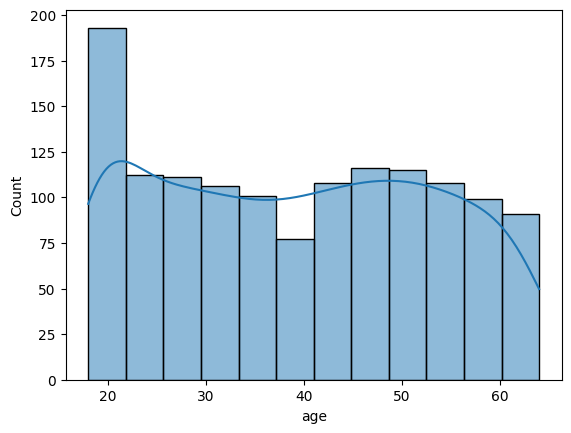

In [16]:
sns.histplot(x="age", data=df, kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

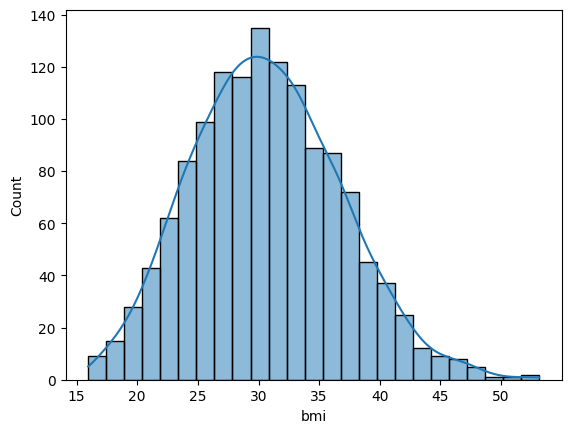

In [17]:
sns.histplot(x="bmi", data=df, kde=True)

<Axes: xlabel='charges', ylabel='Count'>

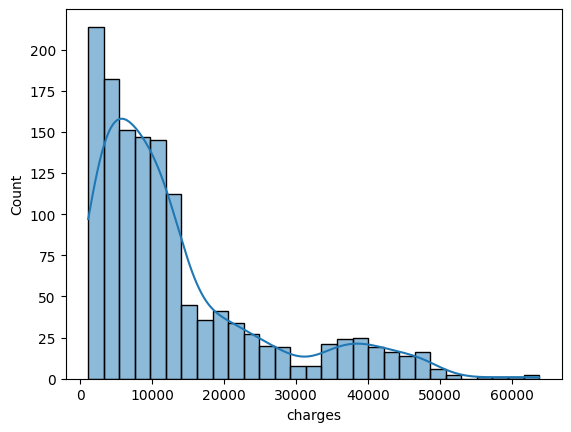

In [18]:
sns.histplot(x="charges", data=df, kde=True)

<Axes: >

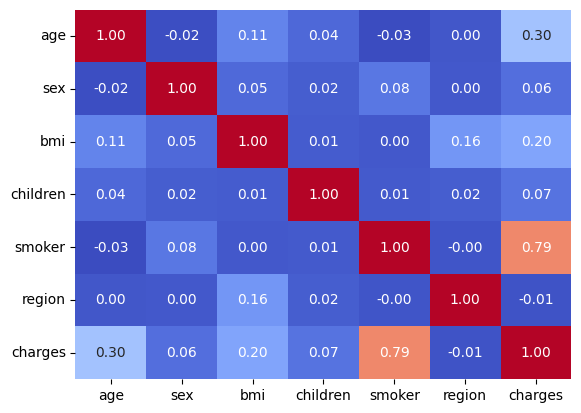

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

<Axes: xlabel='age', ylabel='charges'>

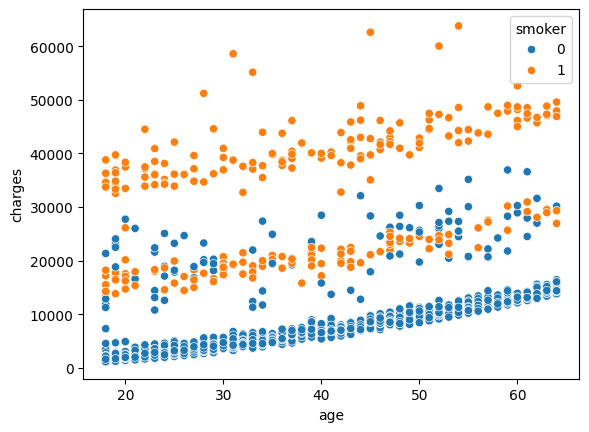

In [20]:
sns.scatterplot(x='age', y='charges', data=df, hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

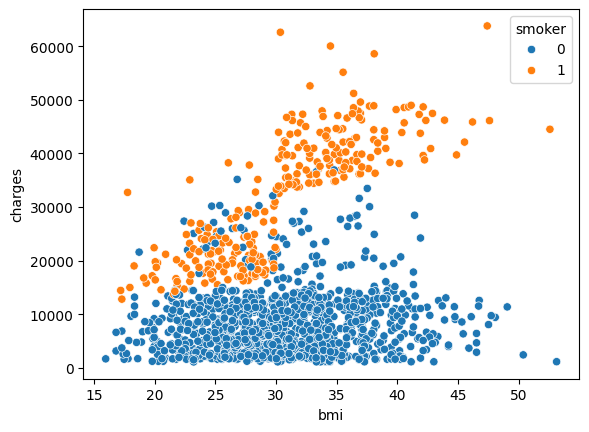

In [21]:
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')

<Axes: xlabel='sex', ylabel='charges'>

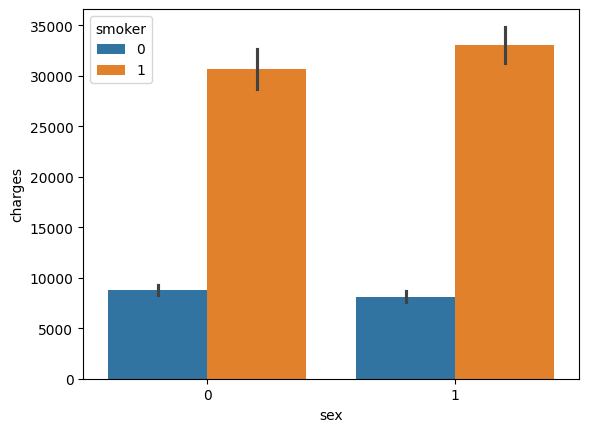

In [22]:
sns.barplot(x='sex', y='charges', data=df, hue='smoker')

<Axes: xlabel='smoker', ylabel='charges'>

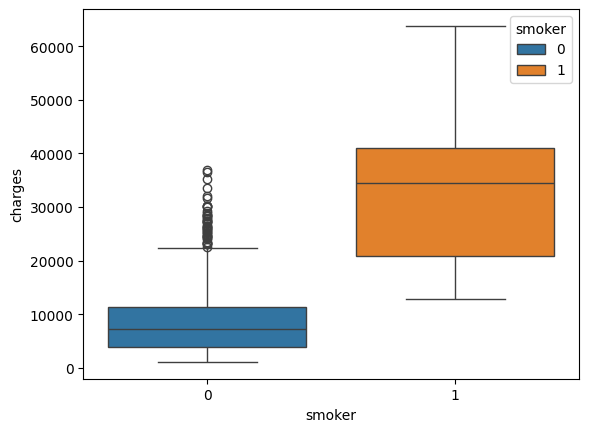

In [23]:
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker')

In [24]:
x = df.drop('charges',axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1069, 6), (268, 6), (1069,), (268,))

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.8068466322629112

In [29]:
mean_squared_error(y_test,y_pred)

35493102.61165051

In [30]:
mean_absolute_error(y_test,y_pred)

4182.353155288296

In [31]:
df_normalized = df.copy()

In [32]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()

df_normalized['bmi'] = min_max_scaler.fit_transform(df_normalized['bmi'].values.reshape(-1,1))
df_normalized['age'] = min_max_scaler.fit_transform(df_normalized['age'].values.reshape(-1,1))
df_normalized['charges'] = min_max_scaler.fit_transform(df_normalized['charges'].values.reshape(-1,1))

In [33]:
df_normalized.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


In [34]:
X = df_normalized.drop('charges',axis=1)
y = df_normalized['charges']
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [35]:
normal_model = LinearRegression()
normal_model.fit(x_norm_train,y_norm_train)

LinearRegression()

In [36]:
y_norm_pred = normal_model.predict(x_norm_test)

In [37]:
r2_score(y_norm_test,y_norm_pred)

0.8068466322629111

In [38]:
mean_squared_error(y_norm_test,y_norm_pred)

0.009043194261536823

In [39]:
mean_absolute_error(y_norm_test,y_norm_pred)

0.06675897336664484

In [40]:
df_standard = df.copy()
# Min-Max Scaling
std_scaler = StandardScaler()

df_standard['bmi'] = std_scaler.fit_transform(df_standard['bmi'].values.reshape(-1,1))
df_standard['age'] = std_scaler.fit_transform(df_standard['age'].values.reshape(-1,1))
df_standard['charges'] = std_scaler.fit_transform(df_standard['charges'].values.reshape(-1,1))

In [41]:
df_standard.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,0,1,3,0.297857
1,-1.511647,1,0.509422,1,0,2,-0.954381
2,-0.799350,1,0.383155,3,0,2,-0.729373
3,-0.443201,1,-1.305052,0,0,1,0.719104
4,-0.514431,1,-0.292456,0,0,1,-0.777499


In [42]:
X = df_standard.drop('charges',axis=1)
y = df_standard['charges']
x_std_train, x_std_test, y_std_train, y_std_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [43]:
std_model = LinearRegression()
std_model.fit(x_std_train,y_std_train)

LinearRegression()

In [44]:
y_std_pred = std_model.predict(x_std_test)

In [45]:
r2_score(y_std_test,y_std_pred)

0.8068466322629111

In [46]:
mean_squared_error(y_std_test, y_std_pred)

0.24218923283989544

In [47]:
mean_absolute_error(y_std_test, y_std_pred)

0.34548256477556377

In [48]:
df_extra = df_normalized.copy()
df_extra["extra1"] = np.linspace(0, 1, len(df_extra))
df_extra["extra2"] = np.linspace(0, 2, len(df_extra))
df_extra["extra3"] = np.linspace(0, 3, len(df_extra))
df_extra["extra4"] = np.linspace(0, 4, len(df_extra))
df_extra["extra5"] = np.linspace(0, 8, len(df_extra))
df_extra["extra6"] = 6
print(df_extra.shape)
df_extra.head()

(1337, 13)


,age,sex,bmi,children,smoker,region,charges,extra1,extra2,extra3,extra4,extra5,extra6
0,0.021739,0,0.321227,0,1,3,0.251611,0.000000,0.000000,0.000000,0.000000,0.000000,6
1,0.000000,1,0.479150,1,0,2,0.009636,0.000749,0.001497,0.002246,0.002994,0.005988,6
2,0.217391,1,0.458434,3,0,2,0.053115,0.001497,0.002994,0.004491,0.005988,0.011976,6
3,0.326087,1,0.181464,0,0,1,0.333010,0.002246,0.004491,0.006737,0.008982,0.017964,6
4,0.304348,1,0.347592,0,0,1,0.043816,0.002994,0.005988,0.008982,0.011976,0.023952,6


In [49]:
X = df_extra.drop(['charges', "extra3", "extra4", "extra5", "extra6"],axis=1)
y = df_extra['charges']
x_extra_train, x_extra_test, y_extra_train, y_extra_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [50]:
X.head()

,age,sex,bmi,children,smoker,region,extra1,extra2
0,0.021739,0,0.321227,0,1,3,0.000000,0.000000
1,0.000000,1,0.479150,1,0,2,0.000749,0.001497
2,0.217391,1,0.458434,3,0,2,0.001497,0.002994
3,0.326087,1,0.181464,0,0,1,0.002246,0.004491
4,0.304348,1,0.347592,0,0,1,0.002994,0.005988


In [51]:
model_extra1 = LinearRegression()
model_extra1.fit(x_extra_train,y_extra_train)

LinearRegression()

In [52]:
y_extra_pred = model_extra1.predict(x_extra_test)
r2_score(y_extra_test,y_extra_pred)

0.8063917837915944

In [60]:
mean_squared_error(y_extra_test,y_extra_pred)

0.009064489686689747

In [61]:
mean_absolute_error(y_extra_test,y_extra_pred)

0.06688993520261136

In [55]:
X = df_extra.drop(['charges'],axis=1)
y = df_extra['charges']
x_extra_train, x_extra_test, y_extra_train, y_extra_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [56]:
model_extra2 = LinearRegression()
model_extra2.fit(x_extra_train,y_extra_train)
y_extra_pred = model_extra2.predict(x_extra_test)
r2_score(y_extra_test,y_extra_pred)

0.8063917837915944

In [57]:
mean_squared_error(y_extra_test,y_extra_pred)

0.009064489686689747

In [58]:
mean_absolute_error(y_extra_test,y_extra_pred)

0.06688993520261136

In [59]:
df_extra["extra7"] = np.linspace(0, 10, len(df_extra))
df_extra["extra8"] = np.linspace(10, 20, len(df_extra))
df_extra["extra9"] = np.linspace(20, 30, len(df_extra))
df_extra["extra10"] = np.linspace(30, 40, len(df_extra))
df_extra.head()

,age,sex,bmi,children,smoker,region,charges,extra1,extra2,extra3,extra4,extra5,extra6,extra7,extra8,extra9,extra10
0,0.021739,0,0.321227,0,1,3,0.251611,0.000000,0.000000,0.000000,0.000000,0.000000,6,0.000000,10.000000,20.000000,30.000000
1,0.000000,1,0.479150,1,0,2,0.009636,0.000749,0.001497,0.002246,0.002994,0.005988,6,0.007485,10.007485,20.007485,30.007485
2,0.217391,1,0.458434,3,0,2,0.053115,0.001497,0.002994,0.004491,0.005988,0.011976,6,0.014970,10.014970,20.014970,30.014970
3,0.326087,1,0.181464,0,0,1,0.333010,0.002246,0.004491,0.006737,0.008982,0.017964,6,0.022455,10.022455,20.022455,30.022455
4,0.304348,1,0.347592,0,0,1,0.043816,0.002994,0.005988,0.008982,0.011976,0.023952,6,0.029940,10.029940,20.029940,30.029940


In [82]:
X = df_extra.drop(['charges'],axis=1)
y = df_extra['charges']
x_extra_train, x_extra_test, y_extra_train, y_extra_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [83]:
x_extra_test.head()

,age,sex,bmi,children,smoker,region,extra1,extra2,extra3,extra4,extra5,extra6,extra7,extra8,extra9,extra10
900,0.673913,1,0.176352,0,0,0,0.672904,1.345808,2.018713,2.691617,5.383234,6,6.729042,16.729042,26.729042,36.729042
1064,0.239130,0,0.259349,4,0,3,0.795659,1.591317,2.386976,3.182635,6.365269,6,7.956587,17.956587,27.956587,37.956587
1256,0.717391,0,0.549502,3,0,1,0.939371,1.878743,2.818114,3.757485,7.514970,6,9.393713,19.393713,29.393713,39.393713
298,0.282609,1,0.495830,3,1,1,0.223054,0.446108,0.669162,0.892216,1.784431,6,2.230539,12.230539,22.230539,32.230539
237,0.282609,1,0.603444,2,0,2,0.177395,0.354790,0.532186,0.709581,1.419162,6,1.773952,11.773952,21.773952,31.773952


In [84]:
model_extra3 = LinearRegression()
model_extra3.fit(x_extra_train,y_extra_train)
y_extra_pred = model_extra3.predict(x_extra_test)
r2_score(y_extra_test,y_extra_pred)

0.8059616608526247

In [85]:
mean_squared_error(y_extra_test,y_extra_pred)

0.009084627493961845

In [86]:
mean_absolute_error(y_extra_test,y_extra_pred)

0.06666936842981869

In [116]:
df_extra = pd.concat([df_extra, df_extra], ignore_index=True)
print(df_extra.shape)
df_extra.head()

(7774, 17)


,age,sex,bmi,children,smoker,region,charges,extra1,extra2,extra3,extra4,extra5,extra6,extra7,extra8,extra9,extra10
0,0.021739,0,0.321227,0,1,3,0.251611,0.000000,0.000000,0.000000,0.000000,0.000000,6,0.000000,10.000000,20.000000,30.000000
1,0.000000,1,0.479150,1,0,2,0.009636,0.000749,0.001497,0.002246,0.002994,0.005988,6,0.007485,10.007485,20.007485,30.007485
2,0.217391,1,0.458434,3,0,2,0.053115,0.001497,0.002994,0.004491,0.005988,0.011976,6,0.014970,10.014970,20.014970,30.014970
3,0.326087,1,0.181464,0,0,1,0.333010,0.002246,0.004491,0.006737,0.008982,0.017964,6,0.022455,10.022455,20.022455,30.022455
4,0.304348,1,0.347592,0,0,1,0.043816,0.002994,0.005988,0.008982,0.011976,0.023952,6,0.029940,10.029940,20.029940,30.029940


In [117]:
X = df_extra.drop(['charges'],axis=1)
y = df_extra['charges']
x_extra_train, x_extra_test, y_extra_train, y_extra_test = train_test_split(X, y,test_size=0.2,random_state=67)

In [118]:
model_extra4 = LinearRegression()
model_extra4.fit(x_extra_train,y_extra_train)
y_extra_pred = model_extra3.predict(x_extra_test)
r2_score(y_extra_test,y_extra_pred)

0.7601362478507614

In [119]:
y_extra_pred = model_extra4.predict(x_extra_train)
r2_score(y_extra_train,y_extra_pred)

0.7553182765477504